In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

In [8]:
# for aesthetic plots
def science_plot(fontsize=9, scistyle=True, show_latex=True):
    # Default settings (applied to both 2D and 3D)
    if scistyle:
        import scienceplots
        plt.style.use(['science','grid','notebook'])
    if show_latex:
        plt.rcParams.update({
            # Latex Use
            'text.usetex'     : True,        # Use LaTeX for text rendering
            'font.family'     : 'serif',     # Set font family to serif
        })
    plt.rcParams.update({
        # Fontsizes
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title

        # Legend
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
    })
#science_plot(fontsize=9)

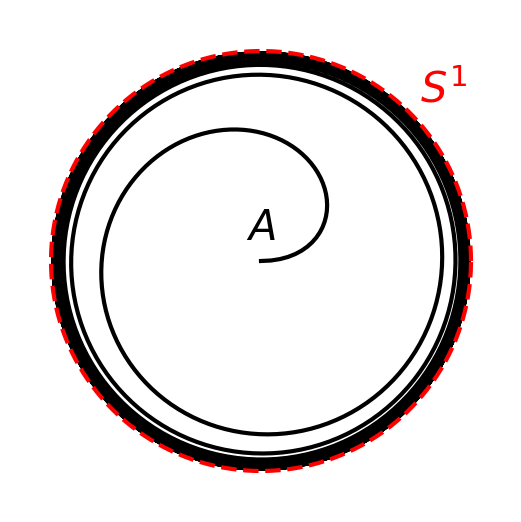

In [9]:
theta = np.linspace(0,100,2000)
r_theta = theta / (theta+1)
theta1 = np.linspace(0,np.pi*2,500)
r_S1 = 0*theta1 + 1 


xw = r_theta*np.cos(theta)
yw = r_theta*np.sin(theta)

xs = r_S1*np.cos(theta1)
ys = r_S1*np.sin(theta1)

plt.figure(figsize=(2,2),dpi= 300)

plt.plot(xw,yw, color='k', linewidth = 1, linestyle = '-')
plt.plot(xs,ys, color='r',linewidth = 1, linestyle = '--')

plt.grid(False)
plt.axis(False)
plt.text(0.707+0.05,0.707+0.05,'$S^1$', color = 'r')
plt.text(0,0.1,'$A$', ha='center')
plt.gca().set_aspect('equal')
plt.show()

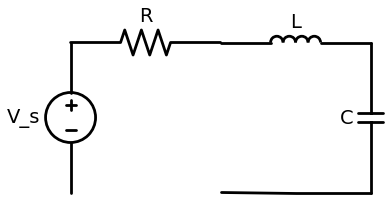

In [10]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.SourceV().up().label('V_s')      # Voltage source
    d += elm.Resistor().right().label('R')    # Resistor
    d += elm.Inductor().right().label('L')    # Inductor
    d += elm.Capacitor().down().label('C')    # Capacitor
    d += elm.Line().left()                     # Wire closing the loop


C:\Users\verci\AppData\Local\Temp\ipykernel_16752\3205133995.py:6: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r,1/r)


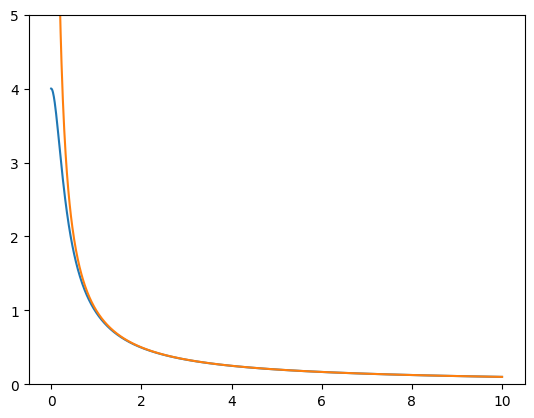

C:\Users\verci\AppData\Local\Temp\ipykernel_16752\3205133995.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r,(1/r -decay)/decay)


(0.0, 0.5)

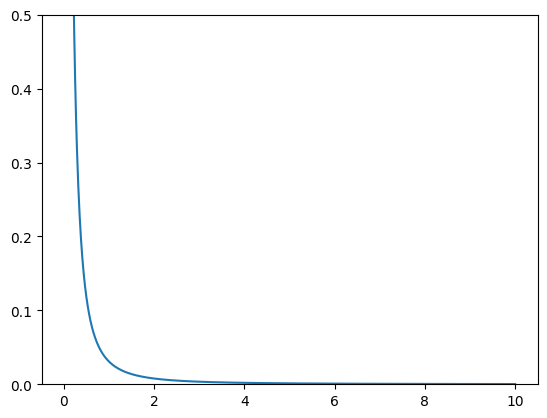

In [11]:
r = np.linspace(0,10,1000)
s = 0.25
decay = 1/np.hypot(r,s)

plt.plot(r,decay)
plt.plot(r,1/r)
plt.ylim(0,5)
plt.show()

plt.plot(r,(1/r -decay)/decay)
plt.ylim(0,0.5)

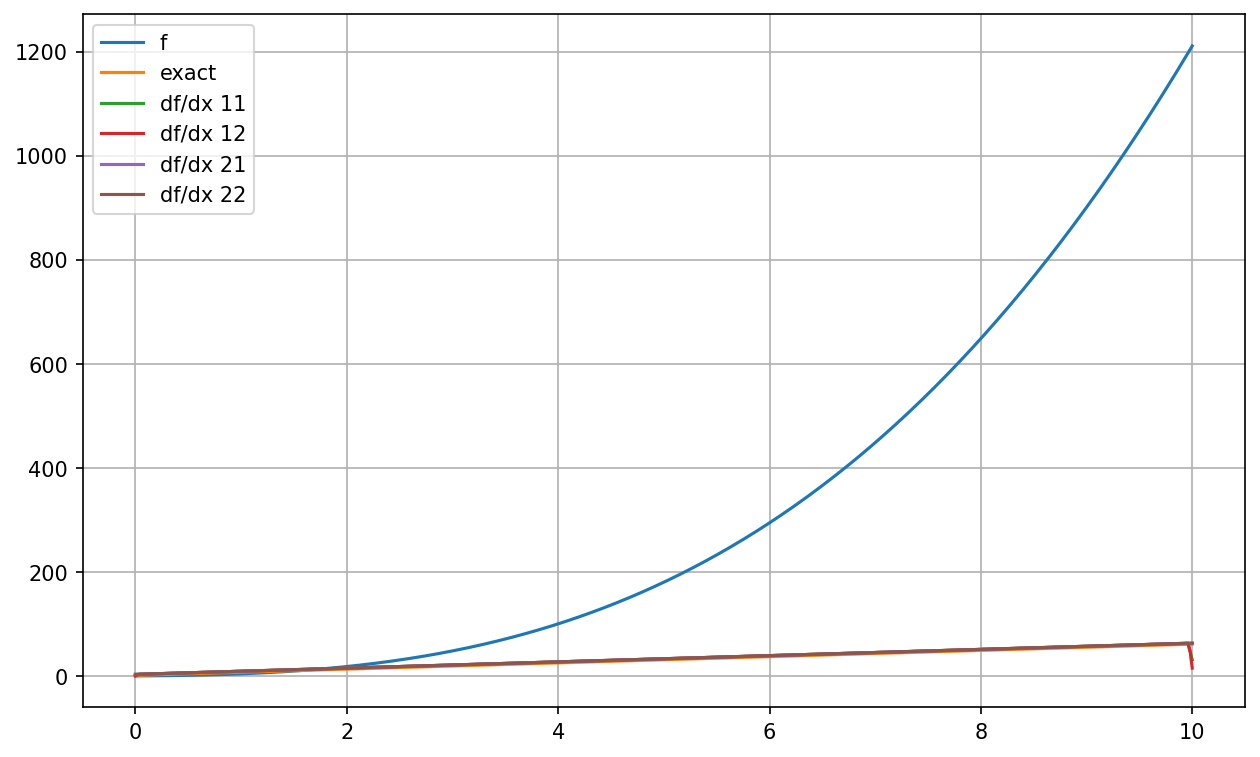

    error@0  error@end  avg_error
11  0.06012   30.06012    2.07424
12  1.00000   46.00000    2.10800
21  2.12024    1.87976    2.00000
22  2.09018    1.90982    2.00000


In [35]:
x = np.linspace(0,10,500)
dx = x[1]-x[0]

f = x**3+2*x**2+x+1
dfdx2_exact = 6*x + 2
df = np.gradient(f, edge_order = 2)
dfdx = df/dx

dfdx2_11 = np.gradient(np.gradient(f, edge_order=1), edge_order=1) / dx**2
dfdx2_12 = np.gradient(np.gradient(f, edge_order=1), edge_order=2) / dx**2
dfdx2_21 = np.gradient(np.gradient(f, edge_order=2), edge_order=1) / dx**2
dfdx2_22 = np.gradient(np.gradient(f, edge_order=2), edge_order=2) / dx**2
plt.figure(figsize=(10,6),dpi=150)
plt.plot(x,f, label ='f')
# plt.plot(x,-f,label='dfdx exact')
plt.plot(x,dfdx2_exact, label='exact')
plt.plot(x,dfdx2_11, label = 'df/dx 11')
plt.plot(x,dfdx2_12, label = 'df/dx 12')
plt.plot(x,dfdx2_21, label = 'df/dx 21')
plt.plot(x,dfdx2_22, label = 'df/dx 22')
#plt.plot(x,np.cumsum(dfdx)*dx)
# plt.plot(x,dfdx2_1)
# plt.plot(x,dfdx2_2)
plt.legend()
plt.grid()
plt.show()


import pandas as pd
# Errors
errors = {
    "11": np.abs(dfdx2_11 - dfdx2_exact),
    "12": np.abs(dfdx2_12 - dfdx2_exact),
    "21": np.abs(dfdx2_21 - dfdx2_exact),
    "22": np.abs(dfdx2_22 - dfdx2_exact),
}

# Collect error metrics into DataFrame
data = {}
for key, err in errors.items():
    data[key] = {
        "error@0": err[0],
        "error@end": err[-1],
        "avg_error": np.mean(np.abs(err)),
    }

df_errors = pd.DataFrame(data).T
print(df_errors)

Stable time step: 0.002273
Number of time steps: 6601
Actual time step: 0.002273


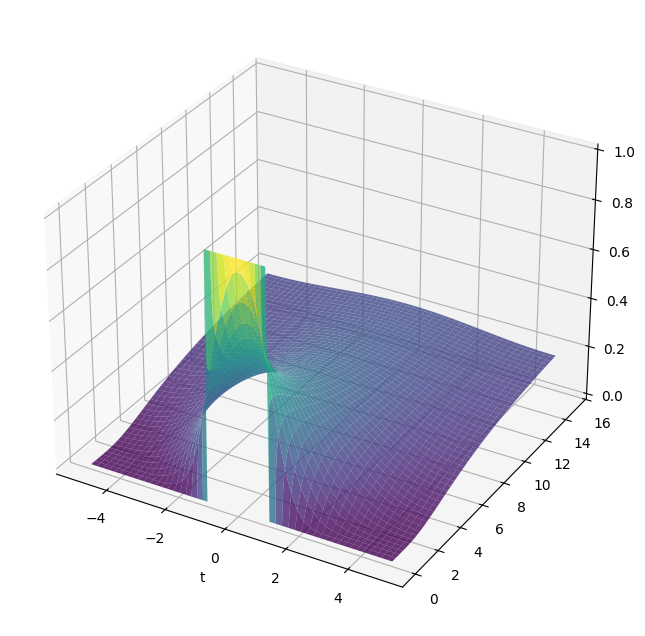

<Figure size 1000x800 with 0 Axes>

Total time steps: 6601
Desired frames for 30 FPS: 450
Frame skip interval: 14
Actual frames in animation: 471


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.5  # diffusion coefficient
x = np.linspace(-5, 5, 200)
dx = x[1] - x[0]

# Calculate stable time step
dt_stable = (dx**2) / (2 * a)*0.9 #for safety margin
print(f"Stable time step: {dt_stable:.6f}")

# Use stable time stepping
t_max = 15
num_time_steps = int(t_max / dt_stable) + 1
t = np.linspace(0, t_max, num_time_steps)
dt = t[1] - t[0]
print(f"Number of time steps: {len(t)}")
print(f"Actual time step: {dt:.6f}")

def laplacian(u, dx):
    dudx2 = np.zeros_like(u)
    dudx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    # boundary points - Neumann (zero derivative)
    dudx2[0] = (u[1] - u[0]) / dx**2
    dudx2[-1] = (u[-2] - u[-1]) / dx**2
    return dudx2

u = np.zeros((len(t), len(x)))
u0 = np.where(np.abs(x)<1,1,0) +  np.where((x<3.5)&(x>3),1,0)
# u0 = np.where(x>0,1,0)
def rk4(u, u0, x, t, a):
    u[0] = u0
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    
    for i in range(len(t)-1):
        k1 = a * laplacian(u[i], dx)
        k2 = a * laplacian(u[i] + 0.5*dt*k1, dx)
        k3 = a * laplacian(u[i] + 0.5*dt*k2, dx)
        k4 = a * laplacian(u[i] + dt*k3, dx)
        u[i+1] = u[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return u

## simulate 
u = rk4(u, u0, x, t, a)


# 3D plot
fig = plt.figure(figsize=(10, 8))
T_mesh, X_mesh = np.meshgrid(t, x)
fig3d = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X_mesh, T_mesh, u.T, cmap='viridis', alpha=0.8)
ax.set_xlabel('x')
ax.set_xlabel('t')
ax.set_zlabel('u')
plt.tight_layout()
plt.show()


from matplotlib.animation import FuncAnimation, PillowWriter
import numpy as np

# Your existing simulation code here...
# u = rk4(u, u0, x, t, a)  # This gives you the full solution

# Calculate frame skipping for 30 FPS
total_simulation_time = t_max  # 10 seconds in your case
desired_fps = 30
total_frames_needed = int(total_simulation_time * desired_fps)  # 10 * 30 = 300 frames
# Calculate frame skip interval
frame_skip = max(1, len(t) // total_frames_needed)
actual_frames = len(t) // frame_skip

print(f"Total time steps: {len(t)}")
print(f"Desired frames for {desired_fps} FPS: {total_frames_needed}")
print(f"Frame skip interval: {frame_skip}")
print(f"Actual frames in animation: {actual_frames}")
# Create animation figure
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, u[0], 'r-', linewidth=2)
ax.set_xlim(-5, 5)
ax.set_ylim(0, 1.2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('1D Heat Diffusion')
ax.grid(True)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
def init():
    line.set_ydata(u[0])
    time_text.set_text(f'Time: {t[0]:.2f}s')
    return line, time_text

def animate(frame_index):
    # Calculate the actual simulation step index
    i = frame_index * frame_skip
    if i >= len(t):
        i = len(t) - 1
    
    line.set_ydata(u[i])
    time_text.set_text(f'Time: {t[i]:.2f}s\nFrame: {frame_index+1}/{actual_frames}')
    return line, time_text

# Create animation with the calculated number of frames
anim = FuncAnimation(fig, animate, init_func=init, 
                    frames=actual_frames, interval=33, blit=True)  # 33ms ≈ 30 FPS
anim.save("heat_diffusion_1d_6.gif", writer=PillowWriter(fps=30))
plt.close(fig)
print('--- ANIMATION SAVED ---')